Simulation de differentes identification de processus

SOPDT (DBR)
FOPDT (DBR)
BROIDA
VAN DER GRINTEN
STREJC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

import package_DBR
from package_DBR import myRound, SelectPath_RT, FOPDT, FOPDT_cost, SOPDT, SOPDT_cost

DATA_LOADING + PLOTS

In [2]:
nameFile = 'Open_loop_experiment_on_MV_2022-04-19-11h17.txt'

if 'MV' in nameFile:
    ExpVariable = 'MV'
else:    
    ExpVariable = 'DV'
    
print(ExpVariable)    
    
titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)
t = data['t'].values - data['t'].values[0]
MV = data['MV'].values
PV = data['PV'].values
DV = data['DV'].values

MV


(45.0, 55.0)

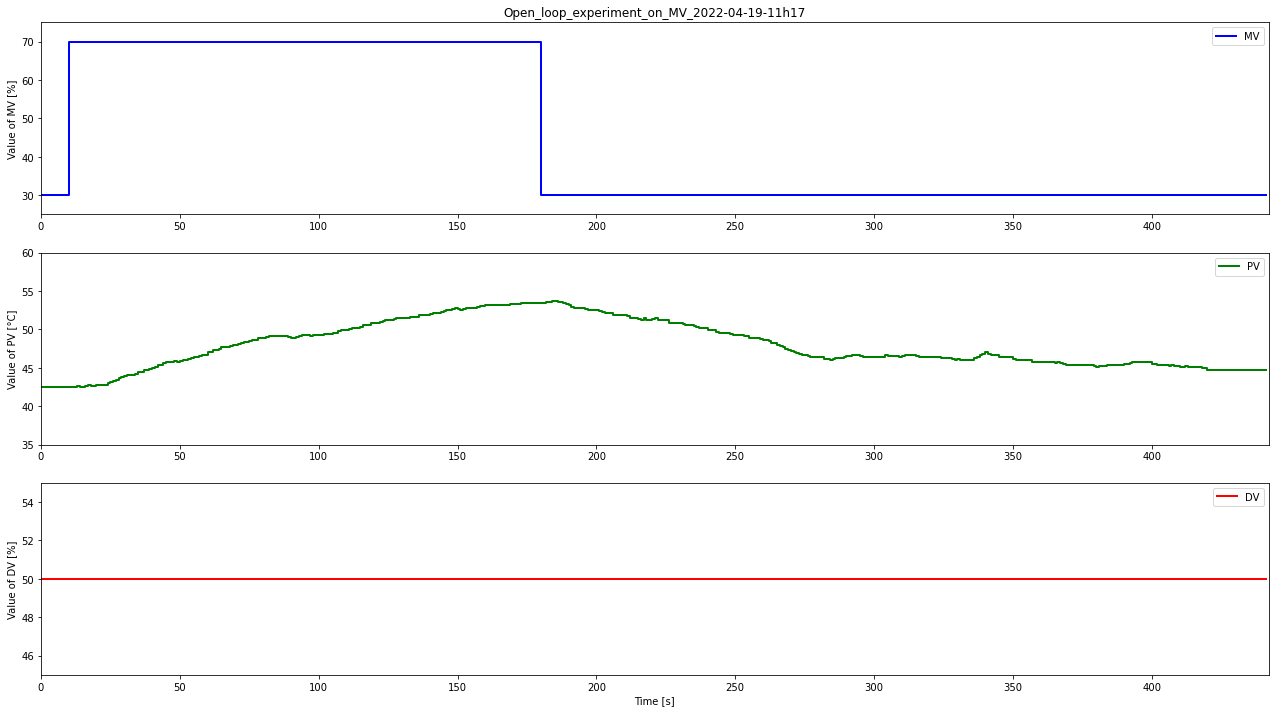

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best')

l1.set_data(t,MV)
l2.set_data(t,PV)
l3.set_data(t,DV)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)
ax3.set_xlim(0, t[-1]+1)

ax1.set_ylim(myRound(np.min(MV),5)-5, myRound(np.max(MV),5)+5)
ax2.set_ylim(myRound(np.min(PV),5)-5, myRound(np.max(PV),5)+5)
ax3.set_ylim(myRound(np.min(DV),5)-5, myRound(np.max(DV),5)+5)

CLEAN DATA + PLOTS

In [4]:
if ExpVariable == 'MV':
    tstep = np.argwhere(np.diff(MV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]    
    MVstep = MV[tstep + 1] - MV[tstep]
    MVm = MV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/MVstep
    MVm = (MVm - MVm[0])/MVstep    
else:    
    tstep = np.argwhere(np.diff(DV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]
    DVstep = DV[tstep + 1] - DV[tstep]    
    DVm = DV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/DVstep
    DVm = (DVm - DVm[0])/DVstep

(0.0, 442.0)

<Figure size 1584x1584 with 0 Axes>

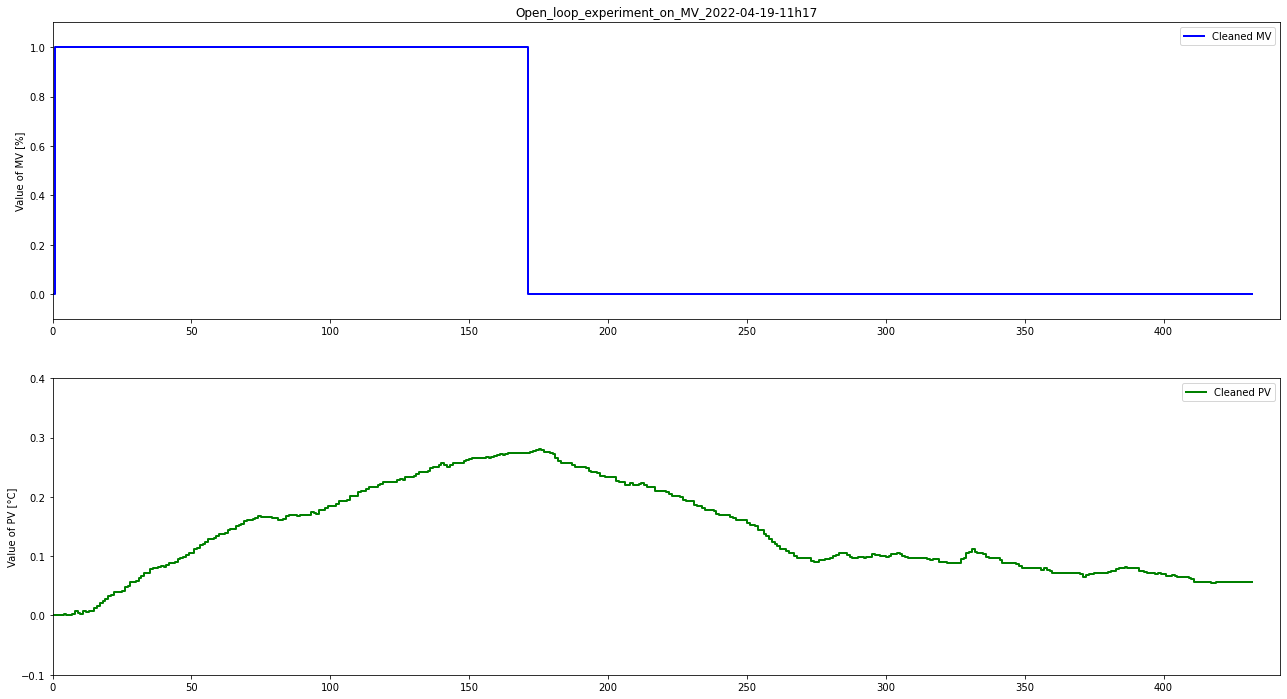

In [5]:
plt.figure(figsize = (22,22))

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)

if ExpVariable == 'MV':
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned MV',where='post')
    ax1.set_ylabel('Value of MV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,MVm)
    ax1.set_ylim(myRound(np.min(MVm),1)-0.1, myRound(np.max(MVm),1)+0.1)    
else:
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned DV',where='post')
    ax1.set_ylabel('Value of DV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,DVm)
    ax1.set_ylim(myRound(np.min(DVm),1)-0.1, myRound(np.max(DVm),1)+0.1)     

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='Cleaned PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(tm,PVm)
ax2.set_ylim(myRound(np.min(PVm),0.1)-0.1, myRound(np.max(PVm),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)

OPTIMISATION FOPDT

In [8]:
Ts = 1.0

maxIter = 500

#FOPDT
p0 = np.zeros(3)
p0[0] = 0.5 # K
p0[1] = 100.0 # T
p0[2] = 10.0 # theta


bnds = ((None, None), (0, None), (0, None))

if ExpVariable == 'MV':
    cost_FOPDT = FOPDT_cost(p0,MVm,PVm,Ts)
else:
    cost_FOPDT = FOPDT_cost(p0,DVm,PVm,Ts)
    
print('Initial FOPDT cost: ' + str(cost_FOPDT))

solution_FOPDT = minimize(FOPDT_cost,p0,args=(MVm,PVm,Ts), method='Powell', bounds=bnds, options={'disp': True})
p_fopdt = solution_FOPDT.x
print('Final SSE Objective FOPDT: ' + str(FOPDT_cost(p_fopdt,MVm,PVm,Ts)))

K_FOPDT = p_fopdt[0]
T_FOPDT = p_fopdt[1]
theta_FOPDT  = p_fopdt[2]

print('K: ' + str(K_FOPDT))
print('T: ' + str(T_FOPDT))
print('theta: ' + str(theta_FOPDT))


Initial FOPDT cost: 2.1397744953525932
Optimization terminated successfully.
         Current function value: 0.068612
         Iterations: 8
         Function evaluations: 443
Final SSE Objective FOPDT: 0.06861210446644299
K: 0.3874168772106143
T: 134.8626375752049
theta: 4.909846646382664


OPTIMISATION SOPDT

In [19]:
Ts = 1.0

maxIter = 500

p1 = np.zeros(4)
p1 [0] = 0.65 # K
p1 [1] = 100.0 # T1
p1 [2] = 20.0 # T2
p1 [3] = 10.0 # theta

bnds = ((None, None), (0, None), (0, None), (0, None))

if ExpVariable == 'MV':
    cost_SOPDT = SOPDT_cost(p1 ,MVm,PVm,Ts)
else:
    cost_SOPDT = SOPDT_cost(p1 ,DVm,PVm,Ts)
    
print('Initial cost: ' + str(cost_SOPDT))

solution_SOPDT = minimize(SOPDT_cost,p1 ,args=(MVm,PVm,Ts), method='Powell', bounds=bnds, options={'disp': True})
p_sopdt = solution_SOPDT.x
print('Final SSE Objective: ' + str(SOPDT_cost(p_sopdt,MVm,PVm,Ts)))

K_SOPDT = p_sopdt[0]
T1_SOPDT = p_sopdt[1]
T2_SOPDT = p_sopdt[2]
theta_SOPDT  = p_sopdt[3]

print('K: ' + str(K_SOPDT ))
print('T1: ' + str(T1_SOPDT ))
print('T2: ' + str(T2_SOPDT ))
print('theta: ' + str(theta_SOPDT ))

Initial cost: 7.717529845813214
Optimization terminated successfully.
         Current function value: 0.068593
         Iterations: 9
         Function evaluations: 619
Final SSE Objective: 0.06859283599848416
K: 0.3870268878656955
T1: 134.48964045587033
T2: 0.18834872361511124
theta: 4.428370012941102


(0.0, 441.0)

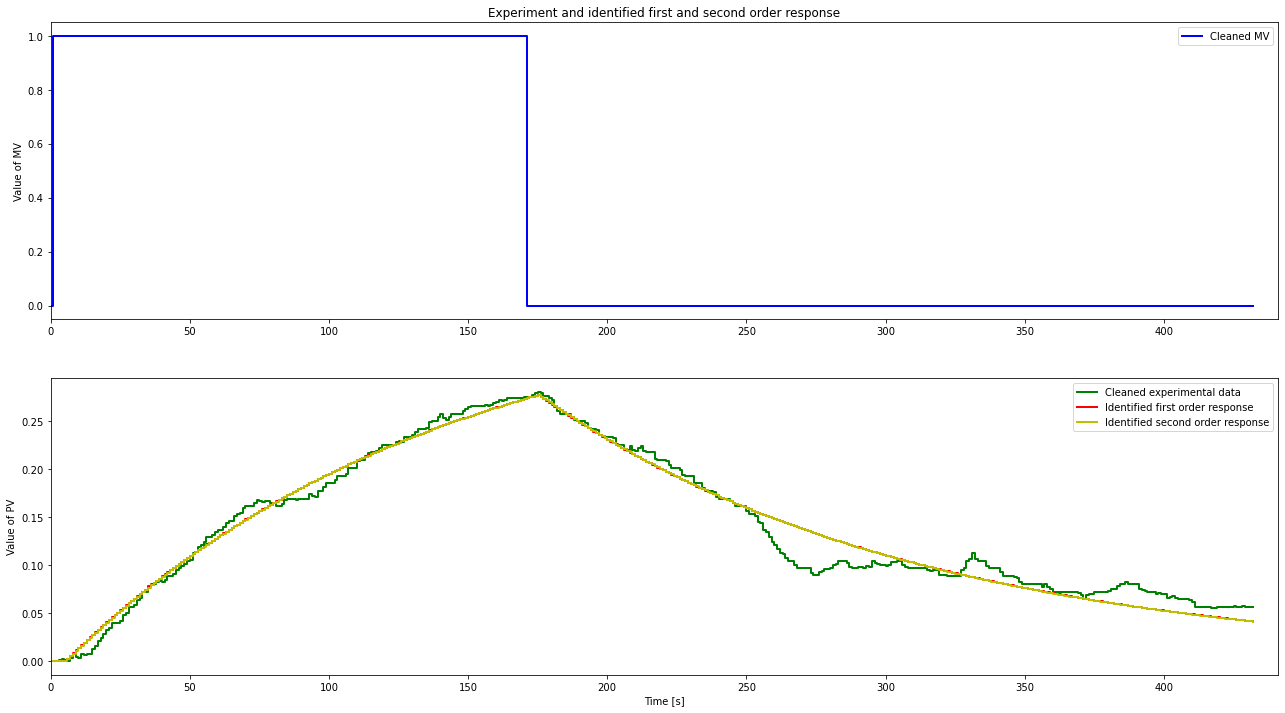

In [22]:
if ExpVariable == 'MV':
    PVSim_fopdt = FOPDT(MVm,K_FOPDT,T_FOPDT,theta_FOPDT,Ts)
    PVSim_sopdt = SOPDT(MVm,K_SOPDT,T1_SOPDT,T2_SOPDT,theta_SOPDT,Ts)
else:
    PVSim_fopdt = FOPDT(DVm,K_FOPDT,T_FOPDT,theta_FOPDT,Ts)
    PVSim_sopdt = SOPDT(DVm,K_SOPDT,T1_SOPDT,T2_SOPDT,theta_SOPDT,Ts)

plt.figure(figsize = (22,12))

plt.subplot(2,1,1)
if ExpVariable == 'MV':
    plt.step(tm,MVm,'b-',linewidth=2,label='Cleaned MV',where='post')
    plt.ylabel('Value of MV')
else:
    plt.step(tm,DVm,'b-',linewidth=2,label='Cleaned DV',where='post')
    plt.ylabel('Value of DV') 
    
plt.title('Experiment and identified first and second order response')
plt.legend(loc='best')
plt.xlim([0, t[-1]])

plt.subplot(2,1,2)
plt.step(tm,PVm,'g-',linewidth=2,label='Cleaned experimental data',where='post')
plt.step(tm,PVSim_fopdt,'r-',linewidth=2,label='Identified first order response',where='post')
plt.step(tm,PVSim_sopdt,'y-',linewidth=2,label='Identified second order response',where='post')

plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, t[-1]])